In [17]:
#Animesh Srivastava 15MI445

#Requirements
#Scipy Version 1.1.0
#numpy Version 1.14.5
#matplotlib Version  2.2.2
#jupyter Version 1.0.0
#*Note that all the higher available versions can support the work

%matplotlib inline
import numpy as np
import scipy as sp
from scipy import stats
from scipy.optimize import fmin
import matplotlib.pyplot as plt
import random

[This cell is formatted to be a Markdown Cell] 

To understand how to use Markdown, refer here: https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet


# Gradient Descent

Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point.

Also refer to Appendix for detailed discussion.

![Gradient Descent](https://optimization.mccormick.northwestern.edu/images/4/4c/Line_search_alogorithm_chart.png)

As a simple example, let's find a local minimum for the function $f(x) = x^3-2x^2+1.5$

To understand gradient descent:
1. https://www.kdnuggets.com/2017/04/simple-understand-gradient-descent-algorithm.html
2. https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html
3. https://medium.com/deep-math-machine-learning-ai/chapter-1-2-gradient-descent-with-math-d4f2871af402

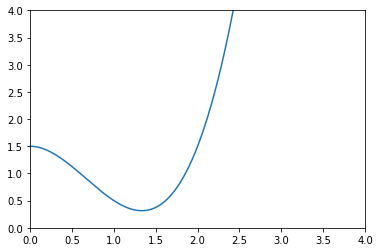

In [18]:
f = lambda x: x**3-2*x**2+1.5
x = np.linspace(-2,3,1000)
plt.plot(x,f(x))
plt.xlim([0,4])
plt.ylim([0,4])
plt.show()

From the graph it is visible that local minimum is near 1.4 or 1.5 (on the x-axis)
Something similar to the graph below, as we can easily see from the figure

![](https://miro.medium.com/max/1400/1*jNyE54fTVOH1203IwYeNEg.png)



But let's pretend that we don't know that, so we set our starting point (arbitrarily, in this case) at $x_0 = 1$

To understand python functions:
https://ehmatthes.github.io/pcc/cheatsheets/README.html

In [20]:
x_old = 0 # Let old value be 0
x_new = 1 # The algorithm starts at x=1
n_k = 0.1 # This is the step size
precision = 0.0001

x_list, y_list = [x_new], [f(x_new)]


def f_prime(x):
    return 3*x**2-4*x #derivative of f
 
while abs(x_new - x_old) > precision:
    x_old = x_new
    s_k = -f_prime(x_old)
    x_new = x_old + n_k * s_k
    x_list.append(x_new)
    y_list.append(f(x_new))
print "Local minimum at:", x_new
print "Number of steps:", len(x_list)

Local minimum at: 1.33324303007
Number of steps: 18


We can also reduce the number of Steps taken by starting from a higher starting point, say at $x_0 = 2$

In [21]:
x_old = 0
x_new = 2 # The algorithm starts at x=1
n_k = 0.1 # step size
precision = 0.0001

x_list, y_list = [x_new], [f(x_new)]


def f_prime(x):
    return 3*x**2-4*x #derivative of f
 
while abs(x_new - x_old) > precision:
    x_old = x_new
    s_k = -f_prime(x_old)
    x_new = x_old + n_k * s_k
    x_list.append(x_new)
    y_list.append(f(x_new))
print "Local minimum at:", x_new
print "Number of steps:", len(x_list)

Local minimum at: 1.33342535085
Number of steps: 17


The figures below show the route that was taken to find the local minimum.
Step Size is taken constant above.
If the step size is too small, then convergence will be very slow, but if we make it too large, then the method may fail to converge at all. 

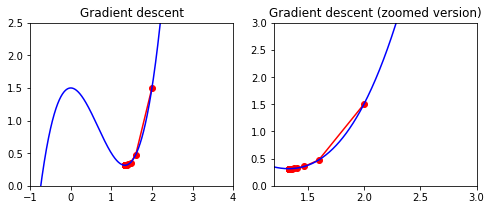

In [22]:
plt.figure(figsize=[8,3])
plt.subplot(1,2,1)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([-1,4])
plt.ylim([0,2.5])
plt.title("Gradient descent")
plt.subplot(1,2,2)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([1.2,3])
plt.ylim([0,3])
plt.title("Gradient descent (zoomed version)")
plt.show()

A solution to this is to use adaptive step sizes as the algorithm below does (using scipy's fmin function to find optimal step sizes):

In [23]:
def f2(n,x,s):
    x = x + n*s
    return f(x)
# We are using x_new to be 1, you can use any higher value in range
x_old = 0
x_new = 1 # The algorithm starts at x=2
precision = 0.0001

x_list, y_list = [x_new], [f(x_new)]

# value of the derivative of our function
def f_prime(x):
    return 3*x**2-4*x

while abs(x_new - x_old) > precision:
    x_old = x_new
    s_k = -f_prime(x_old)
    
    # use scipy fmin function
    n_k = fmin(f2,0.1,(x_old,s_k), full_output = False, disp = False)

    x_new = x_old + n_k * s_k
    x_list.append(x_new)
    y_list.append(f(x_new))
    
print "Local minimum occurs at ", float(x_new)
print "Number of steps:", len(x_list)

Local minimum occurs at  1.33333333282
Number of steps: 3


We can implement it with x_new = 2 also,

In [24]:
def f2(n,x,s):
    x = x + n*s
    return f(x)
# We are using x_new to be 2, you can use any higher value in range
x_old = 0
x_new = 2 # The algorithm starts at x=2
precision = 0.0001

x_list, y_list = [x_new], [f(x_new)]

# value of the derivative of our function
def f_prime(x):
    return 3*x**2-4*x

while abs(x_new - x_old) > precision:
    x_old = x_new
    s_k = -f_prime(x_old)
    
    # use scipy fmin function 
    n_k = fmin(f2,0.1,(x_old,s_k), full_output = False, disp = False)

    x_new = x_old + n_k * s_k
    x_list.append(x_new)
    y_list.append(f(x_new))
    
print "Local minimum occurs at ", float(x_new)
print "Number of steps:", len(x_list)

Local minimum occurs at  1.33333332845
Number of steps: 4


For x_new = 2, With adaptive step sizes, the algorithm converges in just 4 iterations rather than 17. 
We can show this with help of plots. We can see that it converges quickly to a point near the local minimum, so it's hard to even discern the dots after the first two steps until we zoom in very close in the third frame below:

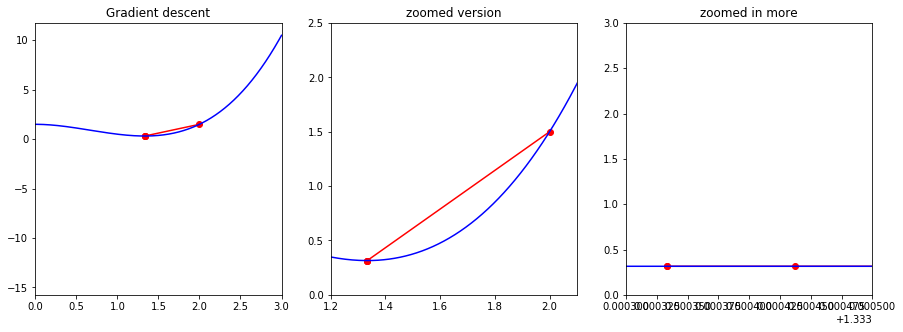

In [25]:
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([0,3])
plt.title("Gradient descent")
plt.subplot(1,3,2)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([1.2,2.1])
plt.ylim([0,2.5])
plt.title("zoomed version")
plt.subplot(1,3,3)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([1.3333,1.3335])
plt.ylim([0,3])
plt.title("zoomed in more")
plt.show()

Another approach to update the step size is choosing a decrease constant $d$ that shrinks the step size over time:
$\eta(t+1) = \eta(t) / (1+t \times d)$.

In [26]:
x_old = 0
x_new = 2 # The algorithm starts at x=2
n_k = 0.17 # step size
precision = 0.0001
t, d = 0, 1

x_list, y_list = [x_new], [f(x_new)]

#derivative of our function
def f_prime(x):
    return 3*x**2-4*x
 
while abs(x_new - x_old) > precision:
    x_old = x_new
    s_k = -f_prime(x_old)
    x_new = x_old + n_k * s_k
    x_list.append(x_new)
    y_list.append(f(x_new))
    n_k = n_k / (1 + t * d)
    t += 1

print "Local minimum occurs at:", x_new
print "Number of steps:", len(x_list)

Local minimum occurs at: 1.33085067409
Number of steps: 6


The graph is plotted after the code

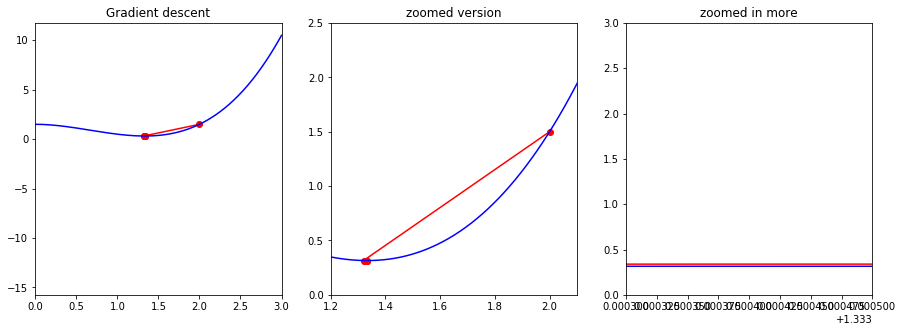

In [27]:
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([0,3])
plt.title("Gradient descent")
plt.subplot(1,3,2)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([1.2,2.1])
plt.ylim([0,2.5])
plt.title("zoomed version")
plt.subplot(1,3,3)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([1.3333,1.3335])
plt.ylim([0,3])
plt.title("zoomed in more")
plt.show()

Appendix:
Gradient Descent and it's variant

Let’s first see how gradient descent works on logistic regression before going into the details of its variants. For the sake of simplicity, let’s assume that the logistic regression model has only two parameters: weight w and bias b.

1. Initialize weight w and bias b to any random numbers.

2. Pick a value for the learning rate α. The learning rate determines how big the step would be on each iteration.

    If α is very small, it would take long time to converge and become computationally expensive.
    If α is large, it may fail to converge and overshoot the minimum.

Therefore, plot the cost function against different values of α and pick the value of α that is right before the first value that didn’t converge so that we would have a very fast learning algorithm that converges, see figure

![](https://miro.medium.com/max/1400/1*rcmvCjQvsxrJi8Y4HpGcCw.png)
   The most commonly used rates are : 0.001, 0.003, 0.01, 0.03, 0.1, 0.3.

3. Make sure to scale the data if it’s on a very different scales. If we don’t scale the data, the level curves (contours) would be narrower and taller which means it would take longer time to converge, see figure.

![](https://miro.medium.com/max/700/1*vXpodxSx-nslMSpOELhovg.png)

Scale the data to have μ = 0 and σ = 1. Below is the formula for scaling each example:

![](https://miro.medium.com/max/573/1*2g6dhidPigWEuAFyNHL8iw.png)

4. On each iteration, take the partial derivative of the cost function J(w) w.r.t each parameter (gradient):

![](https://miro.medium.com/max/634/1*WmuFVQbceFdNKO2Usl_O7A.png)

The update equations are:

![](https://miro.medium.com/max/700/1*VDTl0P6ongCcM0AgDPUR_g.png)

For the sake of illustration, let’s assume we don’t have bias. If the slope of the current value of w > 0, this means that we are to the right of optimal w*. Therefore, the update will be negative, and will start getting close to the optimal values of w*. However, if it’s negative, the update will be positive and will increase the current values of w to converge to the optimal values of w*(see figure):

![](https://miro.medium.com/max/700/1*jNyE54fTVOH1203IwYeNEg.png)

    Continue the process until the cost function converges. That is, until the error curve becomes flat and doesn’t change.
    In addition, on each iteration, the step would be in the direction that gives the maximum change since it’s perpendicular to level curves at each step.

In machine learning, the algorithm above is often called <b>batch gradient descent</b>

In batch gradient descent, we look at every example in the entire training set on every step which can be slow if the training set is sufficiently large. 


## Stochastic gradient descent

The word ‘stochastic‘ means a system or a process that is linked with a random probability. Hence, in Stochastic Gradient Descent, a few samples are selected randomly instead of the whole data set for each iteration. In Gradient Descent, there is a term called “batch” which denotes the total number of samples from a dataset that is used for calculating the gradient for each iteration. In typical Gradient Descent optimization, like Batch Gradient Descent, the batch is taken to be the whole dataset. Although, using the whole dataset is really useful for getting to the minima in a less noisy or less random manner, but the problem arises when our datasets get really huge.
Suppose, you have a million samples in your dataset, so if you use a typical Gradient Descent optimization technique, you will have to use all of the one million samples for completing one iteration while performing the Gradient Descent, and it has to be done for every iteration until the minima is reached. Hence, it becomes computationally very expensive to perform.

This problem is solved by Stochastic Gradient Descent. In SGD, it uses only a single sample, i.e., a batch size of one, to perform each iteration. The sample is randomly shuffled and selected for performing the iteration.

### SGD algorithm:

![](https://cdncontribute.geeksforgeeks.org/wp-content/uploads/sgdn.png)

So, in SGD, we find out the gradient of the cost function of a single example at each iteration instead of the sum of the gradient of the cost function of all the examples.

In SGD, since only one sample from the dataset is chosen at random for each iteration, the path taken by the algorithm to reach the minima is usually noisier than your typical Gradient Descent algorithm. But that doesn’t matter all that much because the path taken by the algorithm does not matter, as long as we reach the minima and with significantly shorter training time.


Path taken by Batch Gradient Descent –
![](https://cdncontribute.geeksforgeeks.org/wp-content/uploads/gdp.png)

Path taken by Stochastic Gradient Descent –
![](https://cdncontribute.geeksforgeeks.org/wp-content/uploads/sgd-1.jpg)

One thing to be noted is that, as SGD is generally noisier than typical Gradient Descent, it usually took a higher number of iterations to reach the minima, because of its randomness in its descent. Even though it requires a higher number of iterations to reach the minima than typical Gradient Descent, it is still computationally much less expensive than typical Gradient Descent. Hence, in most scenarios, SGD is preferred over Batch Gradient Descent for optimizing a learning algorithm.

Pseudo code for SGD in Python:

```python

def SGD(f, theta0, alpha, num_iters): 
    """  
       Arguments: 
       f -- the function to optimize, it takes a single argument 
            and yield two outputs, a cost and the gradient 
            with respect to the arguments 
       theta0 -- the initial point to start SGD from 
       num_iters -- total iterations to run SGD for 
       Return: 
       theta -- the parameter value after SGD finishes 
    """
    start_iter = 0
    theta = theta0 
    for iter in xrange(start_iter + 1, num_iters + 1): 
        _, grad = f(theta) 
   
        # there is NO dot product ! return theta 
        theta = theta - (alpha * grad)  


```

To demonstrate SGD, we'll create a set of 500,000 points around the line $y = 2x+17+\epsilon$, for values of x between 0 and 100:


In [52]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import stats
from scipy.optimize import fmin
import matplotlib.pyplot as plt
import random

f = lambda x: x*2+17+np.random.randn(len(x))*10

x = np.random.random(500000)*100
y = f(x) 
m = len(y)

In [53]:
#First, let's randomly shuffle around our dataset.
from random import shuffle

x_shuf = []
y_shuf = []
index_shuf = range(len(x))
shuffle(index_shuf)
for i in index_shuf:
    x_shuf.append(x[i])
    y_shuf.append(y[i])

Now we'll setup our h function and our cost function, which we will use to check how the value is improving.

In [54]:
h = lambda theta_0,theta_1,x: theta_0 + theta_1*x
cost = lambda theta_0,theta_1, x_i, y_i: 0.5*(h(theta_0,theta_1,x_i)-y_i)**2

Now we'll run our stochastic gradient descent algorithm. To see it's progress, we'll take a cost measurement at every step. Every 10,000 steps, we'll get an average cost from the last 10,000 steps and then append that to our cost_list variable. We will run through the entire list 10 times here:

In [55]:
theta_old = np.array([0.,0.])
theta_new = np.array([1.,1.]) # The algorithm starts at [1,1]
n_k = 0.000005 # step size

iter_num = 0
s_k = np.array([float("inf"),float("inf")])
sum_cost = 0
cost_list = []

for j in range(10):
    for i in range(m):
        iter_num += 1
        theta_old = theta_new
        s_k[0] = (h(theta_old[0],theta_old[1],x[i])-y[i])
        s_k[1] = (h(theta_old[0],theta_old[1],x[i])-y[i])*x[i]
        s_k = (-1)*s_k
        theta_new = theta_old + n_k * s_k
        sum_cost += cost(theta_old[0],theta_old[1],x[i],y[i])
        if (i+1) % 10000 == 0:
            cost_list.append(sum_cost/10000.0)
            sum_cost = 0   
            
print "Local minimum occurs where:"
print "theta_0 =", theta_new[0] 
print "theta_1 =", theta_new[1]

Local minimum occurs where:
theta_0 = 16.980133851
theta_1 = 2.00749524786


As you can see, our values for $\theta_0$ and $\theta_1$ are close to their true values of 17 and 2.

Now, we plot our cost versus the number of iterations. As you can see, the cost goes down quickly at first, but starts to level off as we go through more iterations:

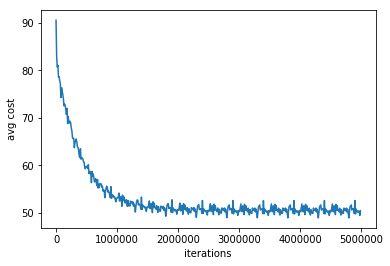

In [56]:
iterations = np.arange(len(cost_list))*10000
plt.plot(iterations,cost_list)
plt.xlabel("iterations")
plt.ylabel("avg cost")
plt.show()

# Mini-Batch Gradient Descent:

## Algorithm:
     Let theta = model parameters and max_iters = number of epochs.

    for itr = 1, 2, 3, …, max_iters:
          for mini_batch (X_mini, y_mini):

        Forward Pass on the batch X_mini:
            Make predictions on the mini-batch
            Compute error in predictions (J(theta)) with the current values of the parameters
        Backward Pass:
            Compute gradient(theta) = partial derivative of J(theta) w.r.t. theta
        Update parameters:
            theta = theta – learning_rate*gradient(theta)

Mini-batch gradient descent makes a compromise between the speedy convergence and the noise associated with gradient update which makes it a more flexible and robust algorithm.

Below is the Python Implementation:

<b>Step #1:</b> First step is to import dependencies, generate data for linear regression and visualize the generated data. We have generated 8000 data examples, each having 2 attributes/features. These data examples are further divided into training set (X_train, y_train) and testing set (X_test, y_test) having 7200 and 800 examples respectively.

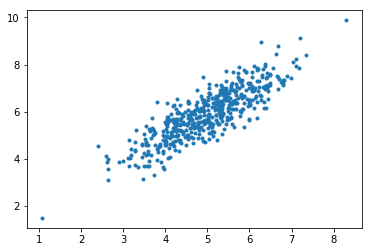

Number of examples in training set =  7200
Number of examples in testing set =  800


In [57]:
# importing dependencies 
import numpy as np 
import matplotlib.pyplot as plt 

# creating data 
mean = np.array([5.0, 6.0]) 
cov = np.array([[1.0, 0.95], [0.95, 1.2]]) 
data = np.random.multivariate_normal(mean, cov, 8000) 

# visualising data 
plt.scatter(data[:500, 0], data[:500, 1], marker = '.') 
plt.show() 

# train-test-split 
data = np.hstack((np.ones((data.shape[0], 1)), data)) 

split_factor = 0.90
split = int(split_factor * data.shape[0]) 

X_train = data[:split, :-1] 
y_train = data[:split, -1].reshape((-1, 1)) 
X_test = data[split:, :-1] 
y_test = data[split:, -1].reshape((-1, 1)) 

print("Number of examples in training set = % d"%(X_train.shape[0])) 
print("Number of examples in testing set = % d"%(X_test.shape[0])) 


<b>Step #2:</b> Next, we write the code for implementing linear regression using mini-batch gradient descent.
gradientDescent() is the main driver function and other functions are helper functions used for making predictions – hypothesis(), computing gradients – gradient(), computing error – cost() and creating mini-batches – create_mini_batches(). The driver function initializes the parameters, computes the best set of parameters for the model and returns these parameters along with a list containing history of errors as the parameters get updated.

In [62]:
# linear regression using "mini-batch" gradient descent 
# function to compute hypothesis / predictions 
def hypothesis(X, theta): 
	return np.dot(X, theta) 

# function to compute gradient of error function w.r.t. theta 
def gradient(X, y, theta): 
	h = hypothesis(X, theta) 
	grad = np.dot(X.transpose(), (h - y)) 
	return grad 

# function to compute the error for current values of theta 
def cost(X, y, theta): 
	h = hypothesis(X, theta) 
	J = np.dot((h - y).transpose(), (h - y)) 
	J /= 2
	return J[0] 

# function to create a list containing mini-batches 
def create_mini_batches(X, y, batch_size): 
	mini_batches = [] 
	data = np.hstack((X, y)) 
	np.random.shuffle(data) 
	n_minibatches = data.shape[0] // batch_size 
	i = 0

	for i in range(n_minibatches + 1): 
		mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
		X_mini = mini_batch[:, :-1] 
		Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
		mini_batches.append((X_mini, Y_mini)) 
	if data.shape[0] % batch_size != 0: 
		mini_batch = data[i * batch_size:data.shape[0]] 
		X_mini = mini_batch[:, :-1] 
		Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
		mini_batches.append((X_mini, Y_mini)) 
	return mini_batches 

# function to perform mini-batch gradient descent 
def gradientDescent(X, y, learning_rate = 0.001, batch_size = 32): 
	theta = np.zeros((X.shape[1], 1)) 
	error_list = [] 
	max_iters = 3
	for itr in range(max_iters): 
		mini_batches = create_mini_batches(X, y, batch_size) 
		for mini_batch in mini_batches: 
			X_mini, y_mini = mini_batch 
			theta = theta - learning_rate * gradient(X_mini, y_mini, theta) 
			error_list.append(cost(X_mini, y_mini, theta)) 

	return theta, error_list 


('Bias = ', array([ 0.74558538]))
('Coefficients = ', array([[ 1.02904296]]))


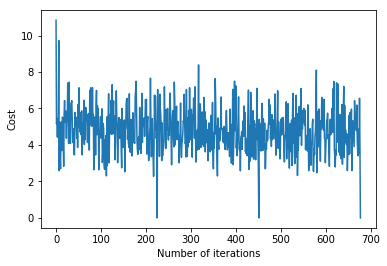

In [63]:
theta, error_list = gradientDescent(X_train, y_train) 
print("Bias = ", theta[0]) 
print("Coefficients = ", theta[1:]) 

# visualising gradient descent 
plt.plot(error_list) 
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show() 


<b>Step #3 :</b> Finally, we make predictions on the testing set and compute the mean absolute error in predictions.

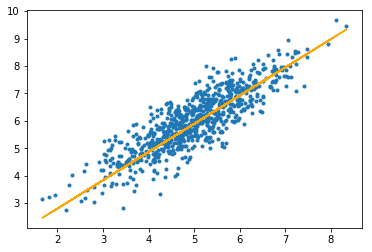

('Mean absolute error = ', 0.45927538637052395)


In [64]:
# predicting output for X_test 
y_pred = hypothesis(X_test, theta) 
plt.scatter(X_test[:, 1], y_test[:, ], marker = '.') 
plt.plot(X_test[:, 1], y_pred, color = 'orange') 
plt.show() 

# calculating error in predictions 
error = np.sum(np.abs(y_test - y_pred) / y_test.shape[0]) 
print("Mean absolute error = ", error) 


The orange line represents the final hypothesis function: <b>theta[0] + theta[1]*X_test[:, 1] + theta[2]*X_test[:, 2] = 0</b>

Appendix:
<b>Comparison between all three</b>

a) <b>Batch Gradient Descent</b>

:Since entire training data is considered before taking a step in the direction of gradient, therefore it takes a lot of time for making a single update.

:It makes smooth updates in the model parameters

b) <b>Stochastic Gradient Descent</b>

:Since only a single training example is considered before taking a step in the direction of gradient, we are forced to loop over the training set and thus cannot exploit the speed associated with vectorizing the code.

:It makes very noisy updates in the parameters

c) <b>Mini-Batch Gradient Descent</b>

:Since a subset of training examples is considered, it can make quick updates in the model parameters and can also exploit the speed associated with vectorizing the code.

:Depending upon the batch size, the updates can be made less noisy – greater the batch size less noisy is the update

#Animesh Srivastava 15MI445